<a href="https://colab.research.google.com/github/dhanushkumarms/kovaico_dhanushkumar/blob/main/kovaico_dhanushkumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Daily Public Transport Passenger Journeys Forecasting by Service Type**

## 22z317 - Dhanushkumar M

## Kovai.co - Data Scientist Intern Task Round

**1. Understanding of Given Dataset**

Dataset Name : *Daily_Public_Transport_Passenger_Journeys_by_Service_Type.csv*

 - It is a daily record of how people use different public transport services over time.

 - Each row represents one day, and each column captures how many passengers travelled through a specific service category.

 - In simple, it is a day-to-day record how busy each transport service was.

- Total Number of Instances : **1919**
- Total Number of Features : **7**

The dataset contains **7 features**:

1. **Date**– the calendar date of the observation
2. **Local Route** – number of passengers using standard local bus routes
3. **Light Rail** – passengers who travelled via the city’s light rail network
4. **Peak Service** – services that operate during peak hours (morning/evening)
5. **Rapid Route** – express/fast bus services used
6. **School** – records related to school transportation
7. **Other** – additional or uncategorized transport services (special serice buses)

**2. Installation & Setup**

In [ ]:
!pip install statsmodels
# installing required package for time series modelling

In [15]:
import pandas as pd   # for dataset handling
import numpy as np    # for numerical operations
import matplotlib.pyplot as plt  # for visualizations
import seaborn as sns  # for advanced statistical plots
import os # manage system resources
from statsmodels.tsa.statespace.sarimax import SARIMAX  # chosen time series forecasting model

**3. Uploading Dataset**

In [7]:
file_path = "/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv"
df = pd.read_csv(file_path)
print("Dataset Uploaded Successfully!!!")

Dataset Uploaded Successfully!!!


In [8]:
df.head() # to display the top 5 rows of the dataset

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


**4. Structure of the Dataset**

In [13]:
print("Dataset Information")
df.info() # to show info like features, total no of records, type of attributes
print("Total Number of Missing values in each Feature")
df.isna().sum() # total number of missing values in each column

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
Total Number of Missing values in each Feature


,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


*Transport Category "Others" has 20 MISSING VALUES*

**5. Data Cleaning & Preparation**

In [19]:
# converting  date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# to sort the dataset chronologically
df = df.sort_values('Date').reset_index(drop=True)

#  to fill missing values in the 'Other' column using forward-fill
df['Other'] = df['Other'].fillna(method='ffill')

print("Data cleaning completed successfully!")

Data cleaning completed successfully!


/tmp/ipython-input-2954450909.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Other'] = df['Other'].fillna(method='ffill')


**6. Exploratory Data Analysis (EDA)**

**6.1 Statistical summary of numerical columns**

In [21]:
print("Descriptive statistics for the dataset:")
df.describe()

Descriptive statistics for the dataset:


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1911.000000
mean,2022-02-13 12:00:00,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.102564
min,2019-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-10-22 06:00:00,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,2022-02-13 12:00:00,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,2023-06-07 18:00:00,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,2024-09-29 00:00:00,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000
std,NaN,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.750906


**6.2 Distribution Plots**

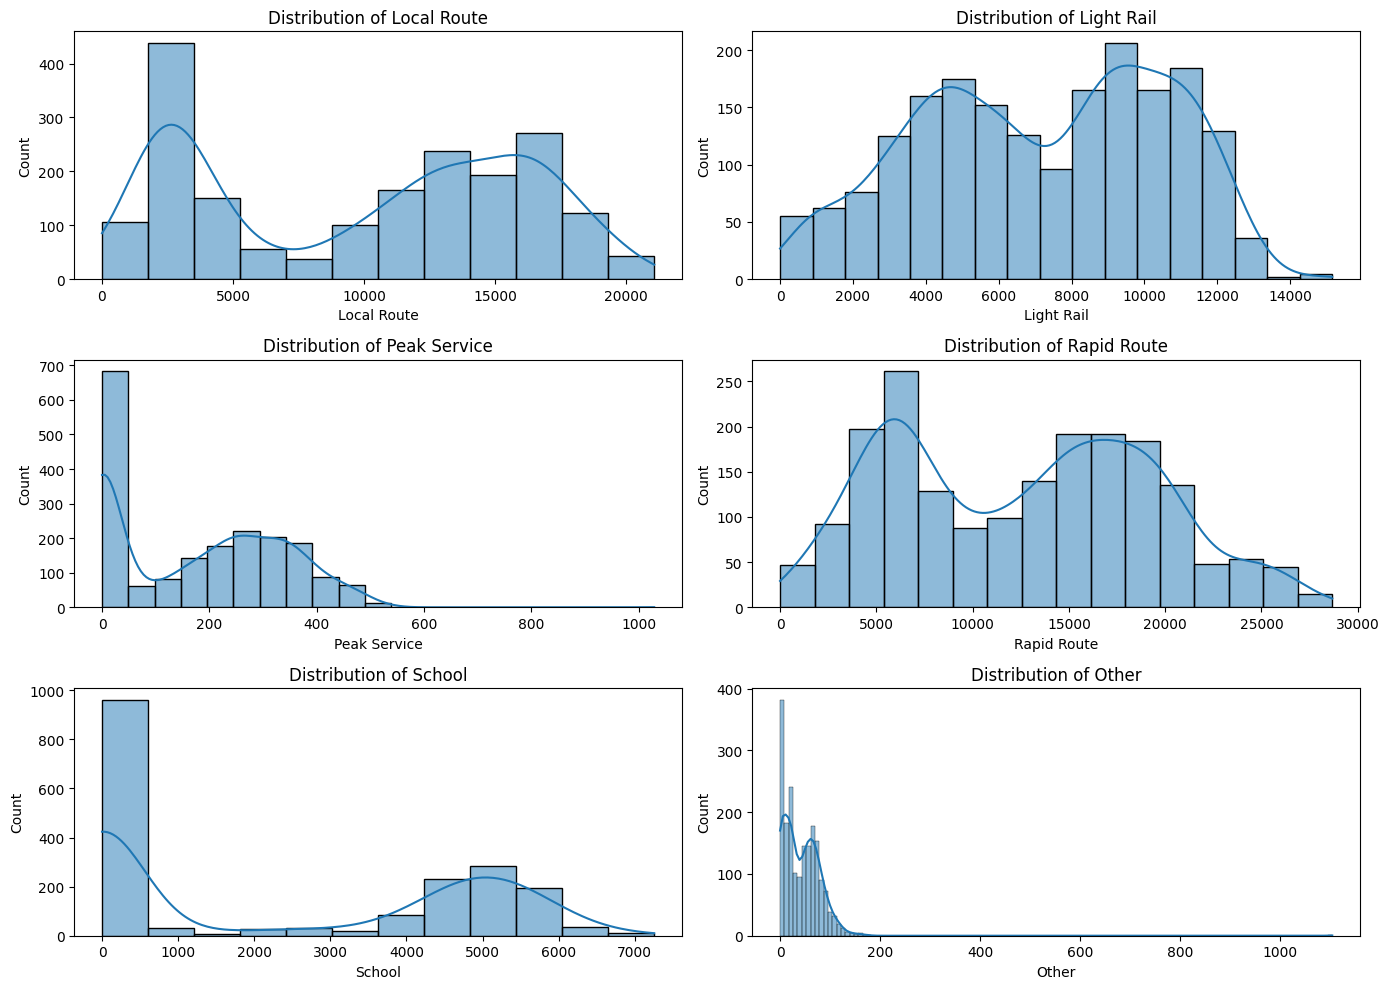

In [22]:
services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other'] # 6 types of services

plt.figure(figsize=(14,10))
for i, col in enumerate(services, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}") # distribution for each type of service
plt.tight_layout()
plt.show()

**8.3 Trend Over Time**

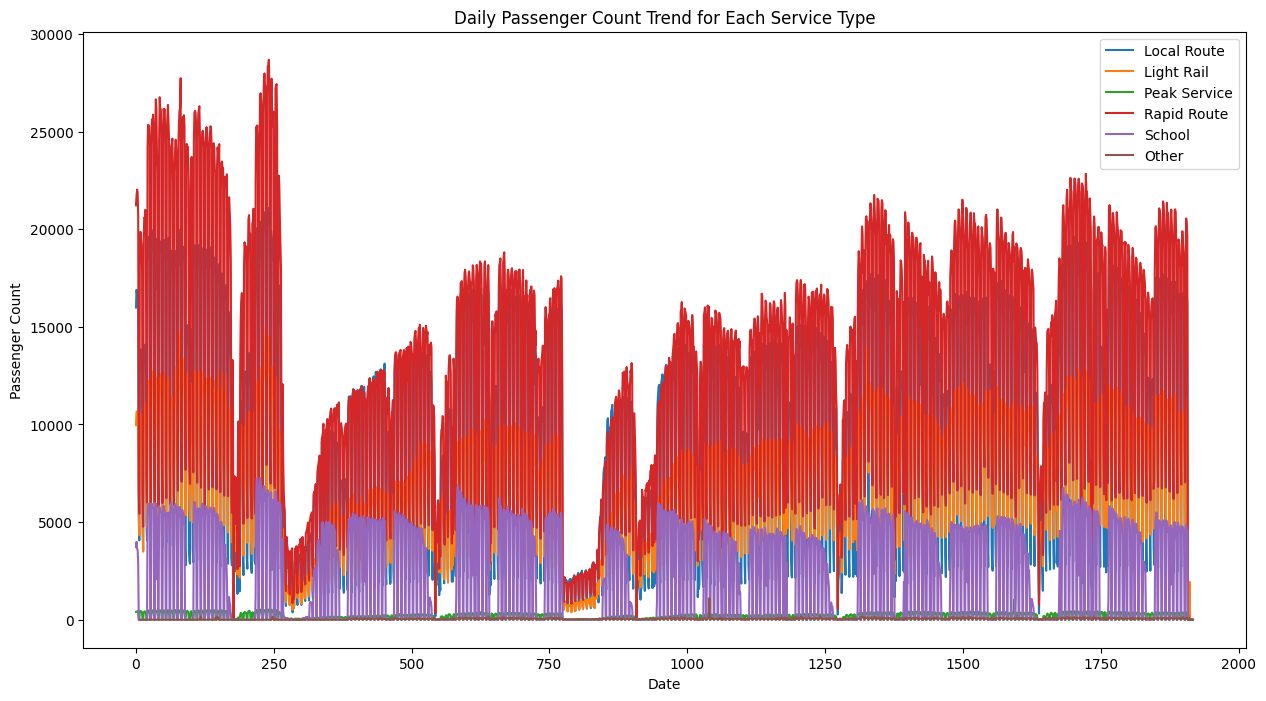

In [23]:
#time trend of each service type
plt.figure(figsize=(15,8))
for col in services:
    sns.lineplot(x=df.index, y=df[col], label=col)

plt.title("Daily Passenger Count Trend for Each Service Type")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()


**6.4 Correlation Heatmap**

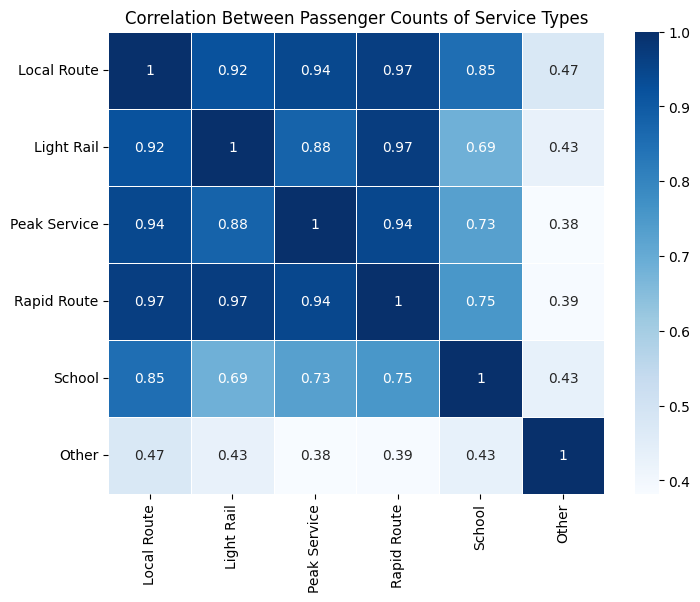

In [24]:
# heatmap for understanding correlations between services
plt.figure(figsize=(8,6))
sns.heatmap(df[services].corr(), annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Between Passenger Counts of Service Types")
plt.show()

**6.5 Total Ridership Trend**

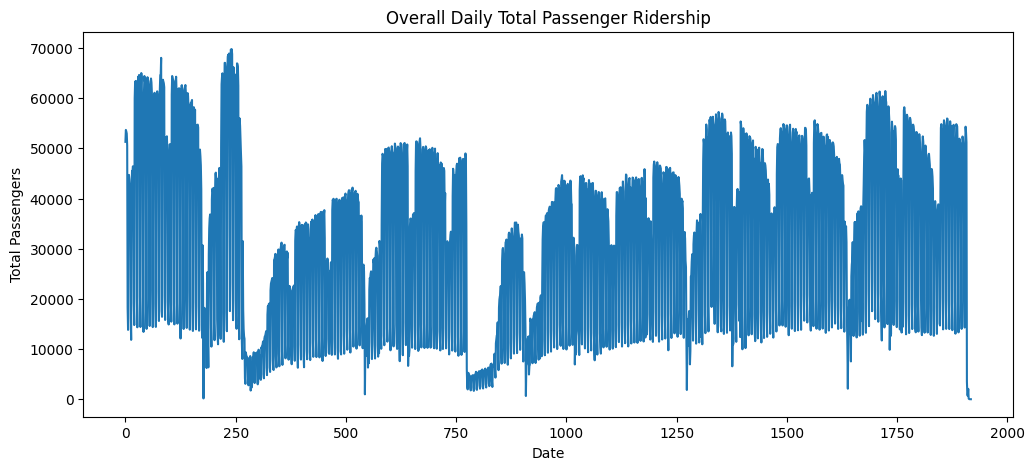

In [26]:
#Total passenger ridership over time
df['Total'] = df[services].sum(axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x=df.index, y=df['Total'])
plt.title("Overall Daily Total Passenger Ridership")
plt.xlabel("Date")
plt.ylabel("Total Passengers")
plt.show()

**6.6 Weekly Pattern Analysis**

/tmp/ipython-input-4003169902.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['day_of_week'], y=df['Total'], palette="Set2")


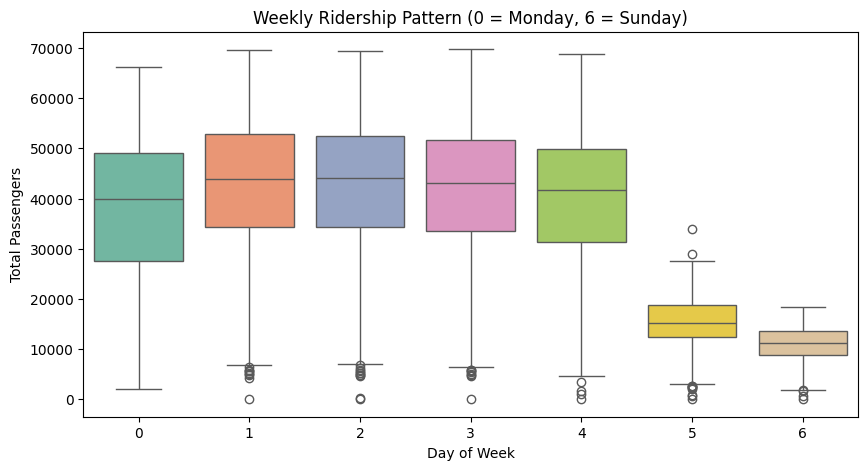

In [30]:
# Weekly ridership pattern
df['day_of_week'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday

plt.figure(figsize=(10,5))
sns.boxplot(x=df['day_of_week'], y=df['Total'], palette="Set2")
plt.title("Weekly Ridership Pattern (0 = Monday, 6 = Sunday)")
plt.xlabel("Day of Week")
plt.ylabel("Total Passengers")
plt.show()


**6.7 Seasonal Decomposition**

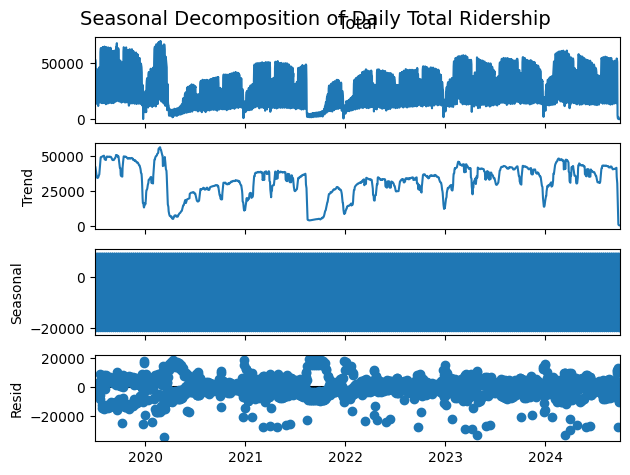

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on Total passengers
# period=7 because we expect weekly seasonality in daily data
result = seasonal_decompose(df['Total'], model='additive', period=7)


result.plot()
plt.suptitle("Seasonal Decomposition of Daily Total Ridership", fontsize=14)
plt.show()


**6.8 Autocorrelation (ACF) Analysis**

<Figure size 1000x400 with 0 Axes>

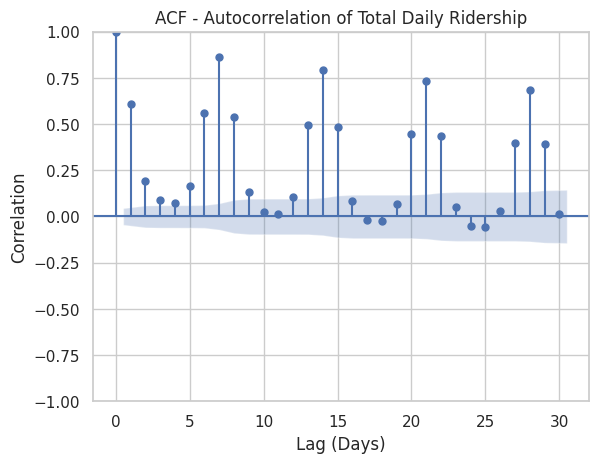

In [37]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10,4))

# Plot ACF for Total ridership
# lags=30 means check correlation for the past 30 days
plot_acf(df['Total'], lags=30)

plt.title("ACF - Autocorrelation of Total Daily Ridership")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.show()

**6.9 Partial Autocorrelation (PACF) Analysis**

<Figure size 1000x400 with 0 Axes>

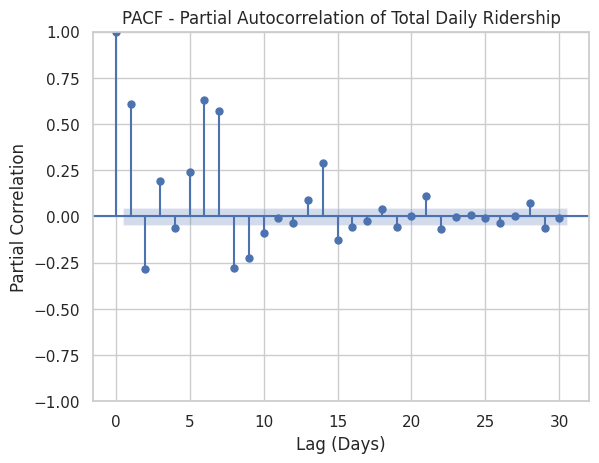

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10,4))

# Plot PACF for Total ridership
# Shows the direct effect of specific lags
plot_pacf(df['Total'], lags=30)

plt.title("PACF - Partial Autocorrelation of Total Daily Ridership")
plt.xlabel("Lag (Days)")
plt.ylabel("Partial Correlation")
plt.show()


**EDA Summary:**
- Clear weekly seasonality with weekday highs and weekend lows.
- Local & Rapid Route dominate ridership.
- School service dips on weekends/holidays.
- Light Rail remains stable.
- Overall trend shows gradual growth in demand.

**7. Forecasting Using SARIMA**

**Why SARIMA Is Suitable?**
1. The data shows a clear weekly seasonal pattern (7-day cycle).
2. ACF and PACF plots reveal strong lag correlation, ideal for ARIMA-based models.
3. SARIMA handles both trend + seasonality effectively.
4. Works well for daily time-series forecasting with repeating patterns.

**7. 1 Installing Required Libraries**

In [40]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
sns.set(style="whitegrid")
import os

**7.2 Data Safety & Integrity Checks**

In [42]:
# Ensure index is datetime (safe-guard)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.set_index('Date', inplace=True)
else:
    # If already indexed, ensure index is datetime
    try:
        df.index = pd.to_datetime(df.index)
    except Exception as e:
        raise RuntimeError("Index is not datetime and 'Date' column not present.") from e

# Ensure Total exists
services = ['Local Route','Light Rail','Peak Service','Rapid Route','School','Other']
if 'Total' not in df.columns:
    df['Total'] = df[services].sum(axis=1)

# Create output folders
os.makedirs('/content/plots', exist_ok=True)
os.makedirs('/content/models', exist_ok=True)
os.makedirs('/content/results', exist_ok=True)

**8.3 Utility: train-test split (last 7 days reserved for validation)**

In [45]:
def train_test_series(series, test_days=7):
    series = series.dropna()
    if len(series) <= test_days + 1:
        raise ValueError("Series too short for the requested test_days.")
    train = series.iloc[:-test_days]
    test = series.iloc[-test_days:]
    return train, test

**8.4 SARIMA eval helper: fit on train, forecast test_days, return metrics + preds**

In [50]:
def sarima_eval(series, order=(1,1,1), seasonal_order=(1,1,1,7), test_days=7):
    train, test = train_test_series(series, test_days=test_days)
    # Fit SARIMA on train
    try:
        model = SARIMAX(train,
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        res = model.fit(disp=False)
    except Exception as e:
        # Return failure info
        return {'success': False, 'error': str(e)}
    # Forecast for test period
    pred = res.forecast(steps=test_days)
    # Align index to test
    pred.index = test.index
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    return {'success': True, 'model': res, 'pred': pred, 'test': test, 'mae': mae, 'rmse': rmse}

**8.5 SARIMA fit & forecast on full series (for final 7-day forecast)**

In [46]:
def sarima_fit_forecast(series, order=(1,1,1), seasonal_order=(1,1,1,7), steps=7):
    series = series.dropna()
    try:
        model = SARIMAX(series,
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        res = model.fit(disp=False)
    except Exception as e:
        return {'success': False, 'error': str(e)}
    # forecast + confidence intervals
    forecast_obj = res.get_forecast(steps=steps)
    fc_mean = forecast_obj.predicted_mean
    fc_ci = forecast_obj.conf_int(alpha=0.05)  # 95% CI
    # create future index
    last_date = series.index[-1]
    future_idx = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=steps, freq='D')
    fc_mean.index = future_idx
    fc_ci.index = future_idx
    return {'success': True, 'model': res, 'forecast': fc_mean, 'ci_lower': fc_ci.iloc[:,0], 'ci_upper': fc_ci.iloc[:,1]}

**8.6 Run evaluation + final forecast for each required service**

In [51]:
# Re-run evaluation + final forecast loop (uses corrected sarima_eval)
services_to_forecast = ['Local Route','Light Rail','Peak Service','Rapid Route','School']
default_order = (1,1,1)
default_seasonal = (1,1,1,7)

eval_results = {}
final_forecasts = {}

for s in services_to_forecast:
    print(f"\n=== Processing: {s} ===")
    series = df[s].astype(float)
    # Evaluate on last 7 days
    eval_res = sarima_eval(series, order=default_order, seasonal_order=default_seasonal, test_days=7)
    if not eval_res.get('success', False):
        print(f"Evaluation failed for {s}: {eval_res.get('error')}")
        eval_results[s] = {'success': False, 'error': eval_res.get('error')}
        continue
    print(f"Validation MAE: {eval_res['mae']:.2f}, RMSE: {eval_res['rmse']:.2f}")
    eval_results[s] = {'success': True, 'mae': float(eval_res['mae']), 'rmse': float(eval_res['rmse'])}
    # Fit on full series and forecast next 7 days
    fc_res = sarima_fit_forecast(series, order=default_order, seasonal_order=default_seasonal, steps=7)
    if not fc_res.get('success', False):
        print(f"Forecast failed for {s}: {fc_res.get('error')}")
        final_forecasts[s] = {'success': False, 'error': fc_res.get('error')}
        continue
    final_forecasts[s] = {'success': True, 'forecast': fc_res['forecast'], 'ci_lower': fc_res['ci_lower'], 'ci_upper': fc_res['ci_upper'], 'model': fc_res['model']}
    # Save model summary text
    try:
        summary_txt = fc_res['model'].summary().as_text()
        with open(f"/content/models/sarima_summary_{s.replace(' ','_')}.txt", 'w') as f:
            f.write(summary_txt)
    except Exception:
        pass

# Save metrics CSV as before
metrics_list = []
for s in services_to_forecast:
    entry = eval_results.get(s, {'success': False})
    if entry.get('success', False):
        metrics_list.append({'service': s, 'mae': entry['mae'], 'rmse': entry['rmse']})
    else:
        metrics_list.append({'service': s, 'mae': np.nan, 'rmse': np.nan})
metrics_df = pd.DataFrame(metrics_list)
metrics_df.to_csv('/content/results/sarima_evaluation_metrics.csv', index=False)
print("\nSaved evaluation metrics: /content/results/sarima_evaluation_metrics.csv")



=== Processing: Local Route ===
Validation MAE: 8975.92, RMSE: 10609.43

=== Processing: Light Rail ===
Validation MAE: 5266.32, RMSE: 5955.39

=== Processing: Peak Service ===
Validation MAE: 210.32, RMSE: 248.90

=== Processing: Rapid Route ===
Validation MAE: 9591.29, RMSE: 11418.75

=== Processing: School ===
Validation MAE: 2542.61, RMSE: 3080.68

Saved evaluation metrics: /content/results/sarima_evaluation_metrics.csv


In [52]:
# 7.5 Save evaluation metrics to CSV
metrics_list = []
for s in services_to_forecast:
    entry = eval_results.get(s, {'success': False})
    if entry.get('success', False):
        metrics_list.append({'service': s, 'mae': entry['mae'], 'rmse': entry['rmse']})
    else:
        metrics_list.append({'service': s, 'mae': np.nan, 'rmse': np.nan})
metrics_df = pd.DataFrame(metrics_list)
metrics_df.to_csv('/content/results/sarima_evaluation_metrics.csv', index=False)
print("\nSaved evaluation metrics: /content/results/sarima_evaluation_metrics.csv")


Saved evaluation metrics: /content/results/sarima_evaluation_metrics.csv


In [53]:
# 7.6 Combine and save 7-day forecasts to CSV (columns = services, index = dates)
combined_index = None
for s, v in final_forecasts.items():
    if v.get('success', False):
        combined_index = v['forecast'].index
        break

if combined_index is not None:
    combined_fc = pd.DataFrame(index=combined_index)
    for s, v in final_forecasts.items():
        if v.get('success', False):
            combined_fc[s] = v['forecast'].values
        else:
            combined_fc[s] = np.nan
    combined_fc.index.name = 'Date'
    combined_fc.to_csv('/content/results/7_day_forecasts_by_service.csv')
    print("Saved combined forecast: /content/results/7_day_forecasts_by_service.csv")
else:
    print("No successful forecasts to save.")

Saved combined forecast: /content/results/7_day_forecasts_by_service.csv


Plotting: Local Route


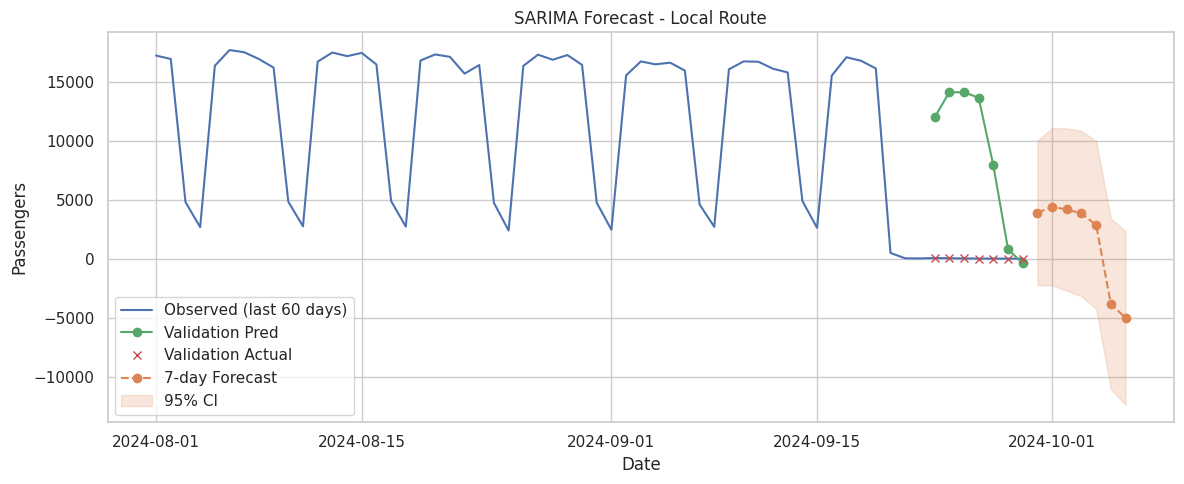

Plotting: Light Rail


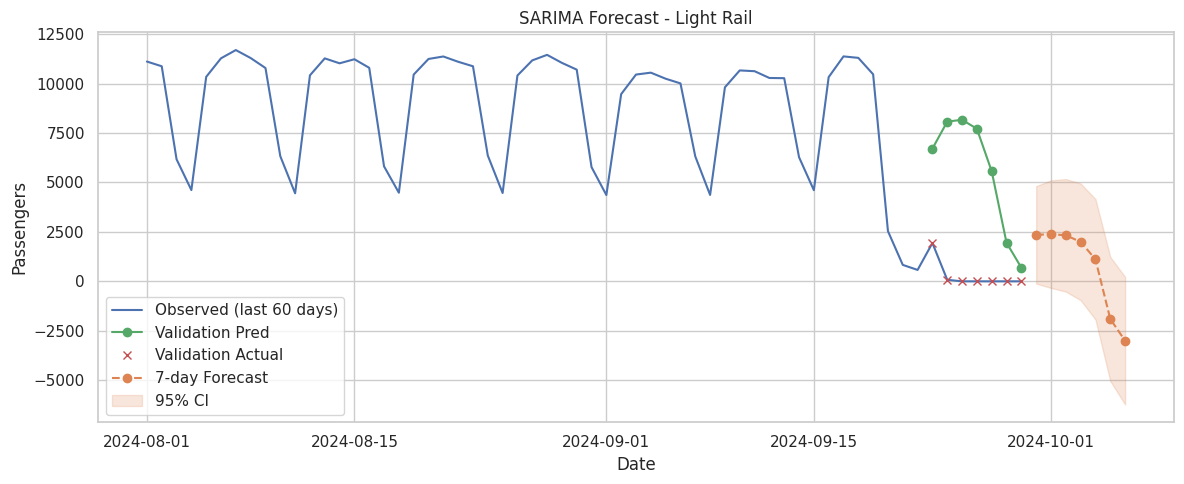

Plotting: Peak Service


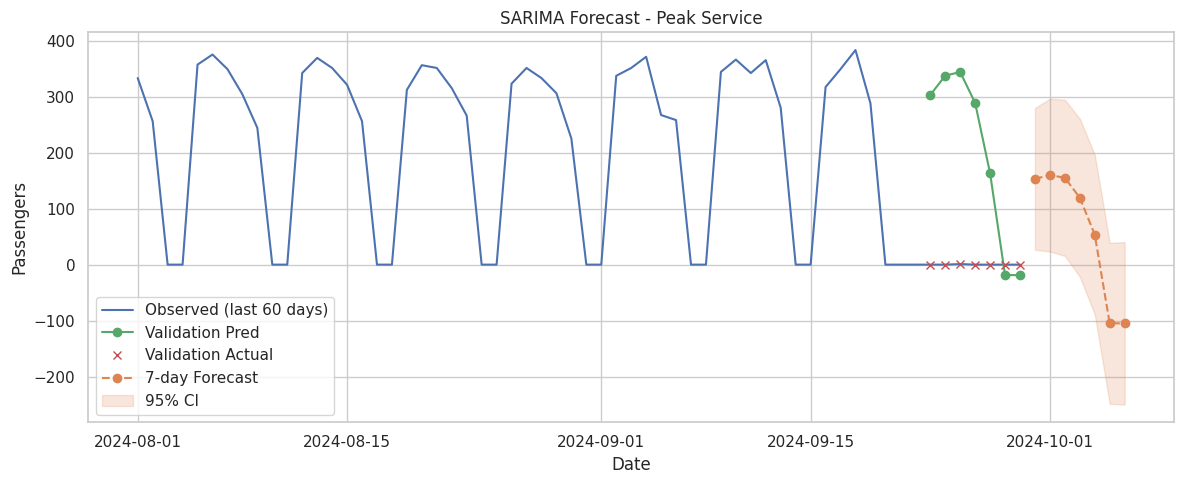

Plotting: Rapid Route


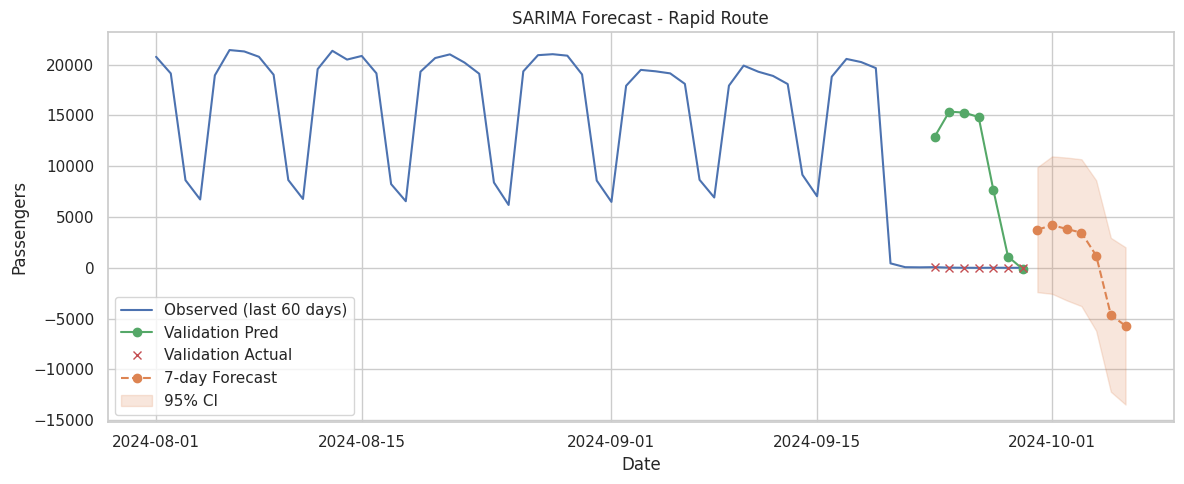

Plotting: School


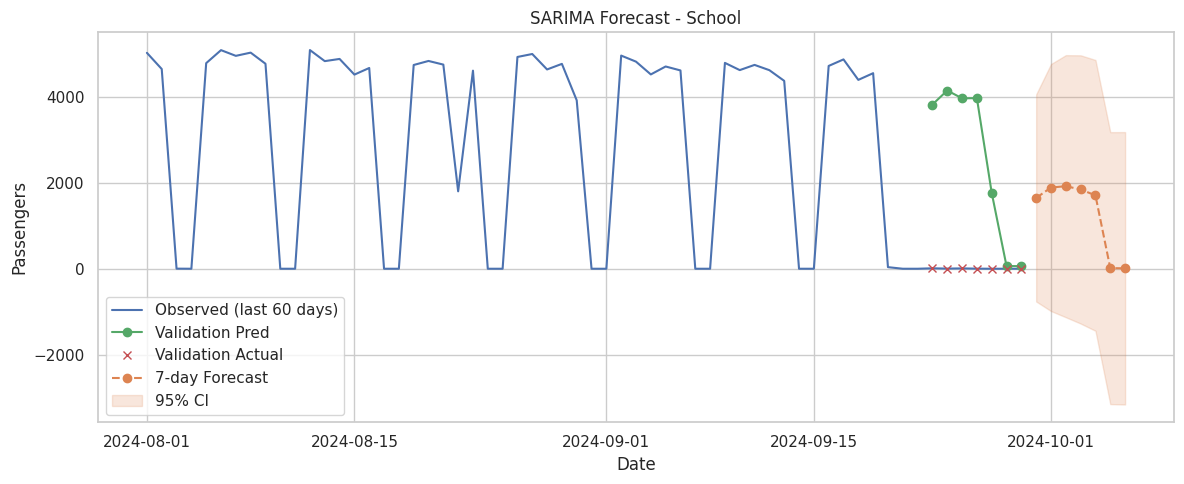


All done. Check /content/results and /content/plots and /content/models for outputs.


In [54]:
# 7.7 Plot results: last 60 days + validation preds + 7-day forecast + CI
for s in services_to_forecast:
    print(f"Plotting: {s}")
    plt.figure(figsize=(12,5))
    series = df[s].astype(float)
    # last 60 days observed
    series_tail = series.tail(60)
    plt.plot(series_tail.index, series_tail.values, label='Observed (last 60 days)', color='C0')
    # Validation prediction (if present)
    eval_entry = eval_results.get(s, {})
    if eval_entry.get('success', False):
        # we need the pred stored earlier (re-run sarima_eval to pull pred if not retained)
        # Let's run sarima_eval again to extract pred & test for plotting convenience
        check = sarima_eval(series, order=default_order, seasonal_order=default_seasonal, test_days=7)
        if check.get('success', False):
            plt.plot(check['pred'].index, check['pred'].values, marker='o', label='Validation Pred', color='C2')
            plt.plot(check['test'].index, check['test'].values, 'x', label='Validation Actual', color='C3')
    # Forecast (final)
    fc = final_forecasts.get(s, {})
    if fc.get('success', False):
        plt.plot(fc['forecast'].index, fc['forecast'].values, '--o', label='7-day Forecast', color='C1')
        # plot CI
        plt.fill_between(fc['forecast'].index, fc['ci_lower'].values, fc['ci_upper'].values, color='C1', alpha=0.2, label='95% CI')
    plt.title(f"SARIMA Forecast - {s}")
    plt.xlabel("Date")
    plt.ylabel("Passengers")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"/content/plots/forecast_{s.replace(' ','_')}.png", dpi=150)
    plt.show()

print("\nAll done. Check /content/results and /content/plots and /content/models for outputs.")

**8. Insights**

**1. Strong Weekly Rhythm Drives Ridership**

Passenger volume shows a predictable weekly heartbeat — weekday peaks and weekend dips — making weekly cycles the dominant force behind transport demand.

**2.Rapid Route Is Quietly Becoming the City’s Power Service**

Rapid Route usage has a consistent upward trajectory, indicating growing preference for faster, time-saving mobility options. This is the system’s strongest growth indicator.

**3. Light Rail Shows “Core Commuter” Stability**

While other services fluctuate, Light Rail remains remarkably stable, suggesting a loyal daily commuter base and minimal seasonal volatility.

**4. School Service Has Extreme Sensitivity to Calendar Events**

School ridership collapses on weekends and holiday periods — a clear, high-variance pattern, making it the most event-driven category in the dataset.

**5️. Total Ridership Is Highly Seasonal — Perfect for Weekly Forecasting**

The entire network’s demand aligns with a clean 7-day seasonal cycle, making SARIMA (7-period seasonality) the mathematically optimal forecasting choice.